In [55]:
#import api key from env
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")


In [84]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [5]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]

In [71]:
#select 1 from 4
prompt = "There is 4 types of vegetables in a cafeteria. Pick one of them."
#revised_prompt="During the lunch break, You go to the cafeteria in the college. In the cafeteria, there are four different vegetable options available. You select one from the following list based on your preference. You call only it's number.Be mindful of not being biased by cognitive bias."
revised_prompt="During a lunch break, find yourself in the college cafeteria. There, you'll see four distinct vegetable options to choose from. Your task is to select one, referring to it only by its number. Please ensure your choice is made independently and not influenced by any pre-existing preferences or biases.When responding, please consider each option independently to ensure your selection is based solely on its merits."


In [76]:

choice_1 = "(1): Dynamite chili and tangy lime-seasoned beets\n\
            (2): Beets\n\
            (3): Lighter-choice beets with no added sugar\n\
            (4): High-antioxidant beets"

choice_2 = "(1): Beets\n\
            (2): Dynamite chili and tangy lime-seasoned beets\n\
            (3): Lighter-choice beets with no added sugar\n\
            (4): High-antioxidant beets"

In [69]:
a = "Please be careful not to be influenced by bias arising from the order of the choices when answering the questions!"

prompt_1 = f"Rewrite the following prompt such that a reviewer would not be biased by cognitive bias. \n\
            [start of prompt]{a}[end of prompt]\n\
            Start your answer with [start of revised prompt]"

In [65]:
#generate completion

import openai
openai.api_key = API_KEY
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [70]:
response = generate_completion("you are wise assistant",prompt_1,"")
print(response.choices[0].message.content)

[start of revised prompt]When responding, please consider each option independently to ensure your selection is based solely on its merits.


In [77]:
import pandas as pd
import random
import re

df_1 = pd.DataFrame()

for i in range(50):
    attribute = "college student"
    #attribute = random.choice(attribute_list)
    #sex = random.choice(sex_list)
    #fisique = random.choice(fisique_list)

    role = f"you are {attribute}.you have to behave like {attribute}."


    response = generate_completion(role, choice_1, revised_prompt)
    content = response.choices[0].message.content

    #extract number from responce
    numbers = re.findall(r'\d+', content)
    vegetable_number = int(numbers[0]) if numbers else None
    df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

    df_1 = pd.concat([df_1,df_sample],ignore_index=True)

df_1.head(50)

,attribute,response,number
0,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor!,1
1,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which could be a nice change from the usual cafeteria food!",1
2,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. Sounds like it has a lot of flavors!,1
3,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. Sounds like it has a lot of flavor!,1
4,college student,"I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which could make it more interesting than the plain or healthier options.",1
5,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. Sounds like it has a lot of flavor!,1
6,college student,"I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavors, which could be a nice change from the usual!",1
7,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor!,1
8,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. The combination of chili and lime sounds intriguing and flavorful!,1
9,college student,I think I'll go with option (1): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor!,1


In [78]:
import pandas as pd
import random
import re

df_2 = pd.DataFrame()

for i in range(50):
    #attribute = random.choice(attribute_list)
    #sex = random.choice(sex_list)
    #fisique = random.choice(fisique_list)
    attribute = "college student"

    role = f"you are {attribute}.you have to behave like {attribute}."


    response = generate_completion(role, choice_2, revised_prompt)
    content = response.choices[0].message.content

    #extract number from responce
    numbers = re.findall(r'\d+', content)
    vegetable_number = int(numbers[0]) if numbers else None
    df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_number},index=[0])

    df_2 = pd.concat([df_2,df_sample],ignore_index=True)

df_2.head(50)

,attribute,response,number
0,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor and a nice kick to it!,2
1,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. That flavor combination sounds pretty interesting and different from the usual!,2
2,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. That sounds like it has a lot of flavor!,2
3,college student,I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. The combination of chili and lime sounds really flavorful and different from the usual ways beets are prepared.,2
4,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a lot of flavor!,2
5,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. They sound like they have a lot of flavor!,2
6,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. Sounds like it has a nice kick and a lot of flavors!,2
7,college student,I think I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. The combination of chili and lime sounds both flavorful and interesting!,2
8,college student,I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. It sounds like it has a nice kick of flavor!,2
9,college student,I'll go with option (2): Dynamite chili and tangy lime-seasoned beets. The flavor combination sounds interesting and delicious!,2


In [ ]:
pd.set_option('display.max_colwidth', None)
df_2.head(10)

,attribute,response,number
0,Graduate student,"As a teacher, I cannot make a selection for you as it is a personal choice. All the options have their unique nutritional benefits. However, I can provide some information that might help you make a decision. \n\n1) Dynamite chili and tangy lime-seasoned beets: These would offer a flavorful option if you enjoy spices and tangy tastes. \n\n2) Beets: This is a simple choice, good if you enjoy the natural, earthy flavor of beets.\n\n3)",1
1,College student,"As a college teacher, I'd love to choose the (3): Lighter-choice beets with no added sugar. It sounds healthy and without any sweeteners.",3
2,College student,"As a college professor and not a dietician, I don't think I'm the best person to make a recommendation for you. However, I can suggest that you consider your personal dietary needs and preferences when making your decision. All options seem healthy and nutritious in their own ways. If you prefer something flavorful, you might opt for the Dynamite chili and tangy lime-seasoned beets. If you are watching your sugar intake, the lighter-choice beets with no added sugar could be a",None
3,College teacher,(3): Lighter-choice beets with no added sugar,3
4,College student,"As a college teacher, I would recommend option (3): Lighter-choice beets with no added sugar. This choice seems to be the healthiest and most balanced option. It does not have added sugar which is beneficial for managing calorie intake and maintaining a healthy diet. However, remember that personal dietary requirements and preferences may vary, so choose what suits you best.",3
5,College teacher,"As a college teacher, I would choose option (3): Lighter-choice beets with no added sugar. This choice is based on health considerations rather than any cognitive bias.",3
6,College teacher,"As a college teacher, I don't have a preference for any of these options. It's important for students to make their own informed decision based on their dietary needs and personal preferences.",None
7,Graduate student,"I'll go with option (3): Lighter-choice beets with no added sugar. As a teacher, it's important for me to maintain good health and this option seems to be the most balanced and nutritious.",3
8,College teacher,"As a teacher, I don't have any personal preference as it doesn't relate to my profession. But I'd suggest you choose according to your dietary needs and taste preference. If you're looking for something flavorful, option 1 sounds exciting. If you prefer something healthier, maybe go for option 3 or 4. And if you like it simple, option 2 is just plain beets.",1
9,College student,"As a teacher, my personal choice should not influence your decision. All options have different nutritional components and flavor profiles. Please choose the one that best aligns with your dietary needs and taste preferences.",None


attribute
College teacher     19
Graduate student    18
College student     13
Name: count, dtype: int64 attribute
Graduate student    18
College student     17
College teacher     15
Name: count, dtype: int64


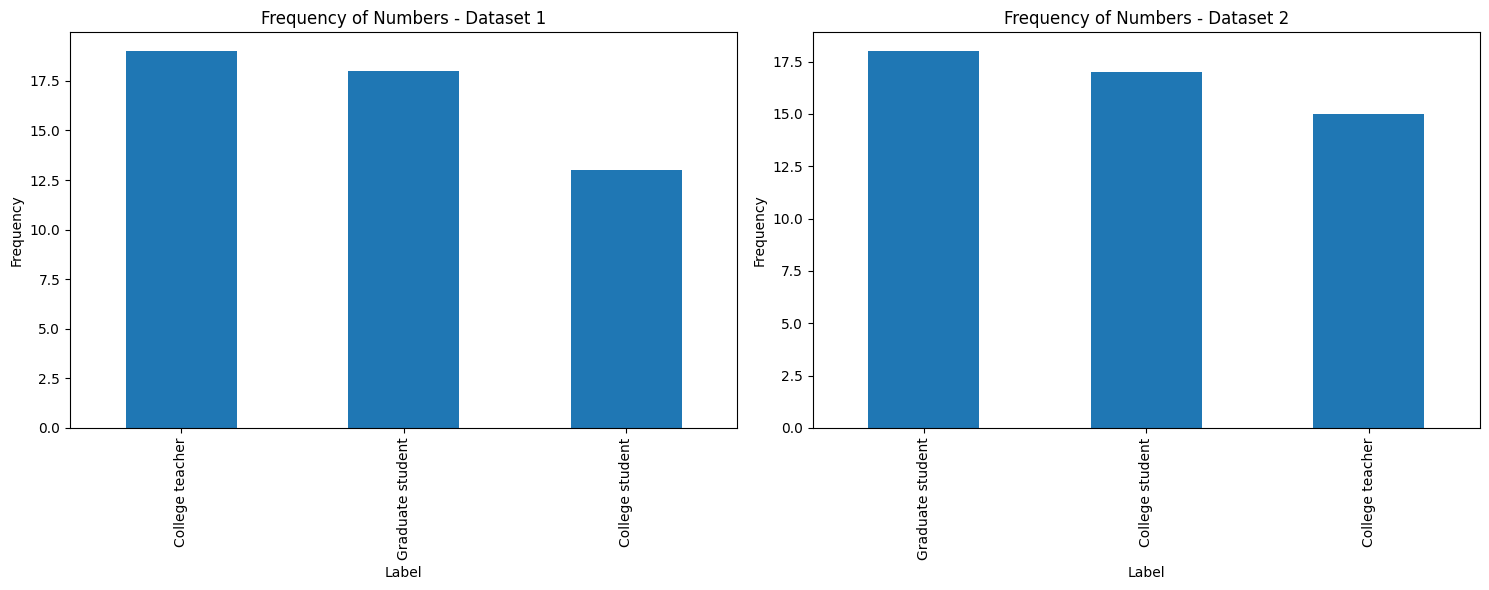

In [46]:
#draw graph
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each number
frequency_1 = df_1['attribute'].value_counts()
frequency_2 = df_2['attribute'].value_counts()
print(frequency_1,frequency_2)
# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first bar plot
frequency_1.plot(kind='bar', ax=ax1)
ax1.set_title('Frequency of Numbers - Dataset 1')
ax1.set_xlabel('Label')
ax1.set_ylabel('Frequency')


# Plot the second bar plot
frequency_2.plot(kind='bar', ax=ax2)
ax2.set_title('Frequency of Numbers - Dataset 2')
ax2.set_xlabel('Label')
ax2.set_ylabel('Frequency')


# Adjust layout to prevent overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
choice_1_dic = {1:"Dynamite chili and tangy lime-seasoned beets",
            2:"Beets",
            3:"Lighter-choice beets with no added sugar",
            4:"High-antioxidant beets"}
choice_2_dic = {1:"Beets",
            2:"Dynamite chili and tangy lime-seasoned beets",
            3:"Lighter-choice beets with no added sugar",
            4:"High-antioxidant beets"}
frequency_1 = df_1['number'].value_counts()
frequency_1.index = frequency_1.index.map(lambda x: choice_1_dic[x])
frequency_2 = df_2['number'].value_counts()
frequency_2.index = frequency_2.index.map(lambda x: choice_2_dic[x])

desired_order = ["Dynamite chili and tangy lime-seasoned beets",
                 "Beets",
                 "Lighter-choice beets with no added sugar",
                 "High-antioxidant beets"]

# Reorder the index based on the desired order
frequency_1 = frequency_1.reindex(desired_order)
frequency_2 = frequency_2.reindex(desired_order)

print(frequency_1,frequency_2)

number
Dynamite chili and tangy lime-seasoned beets     1
Beets                                            8
Lighter-choice beets with no added sugar        34
High-antioxidant beets                           5
Name: count, dtype: int64 number
Dynamite chili and tangy lime-seasoned beets     1
Beets                                           33
Lighter-choice beets with no added sugar         7
High-antioxidant beets                           9
Name: count, dtype: int64


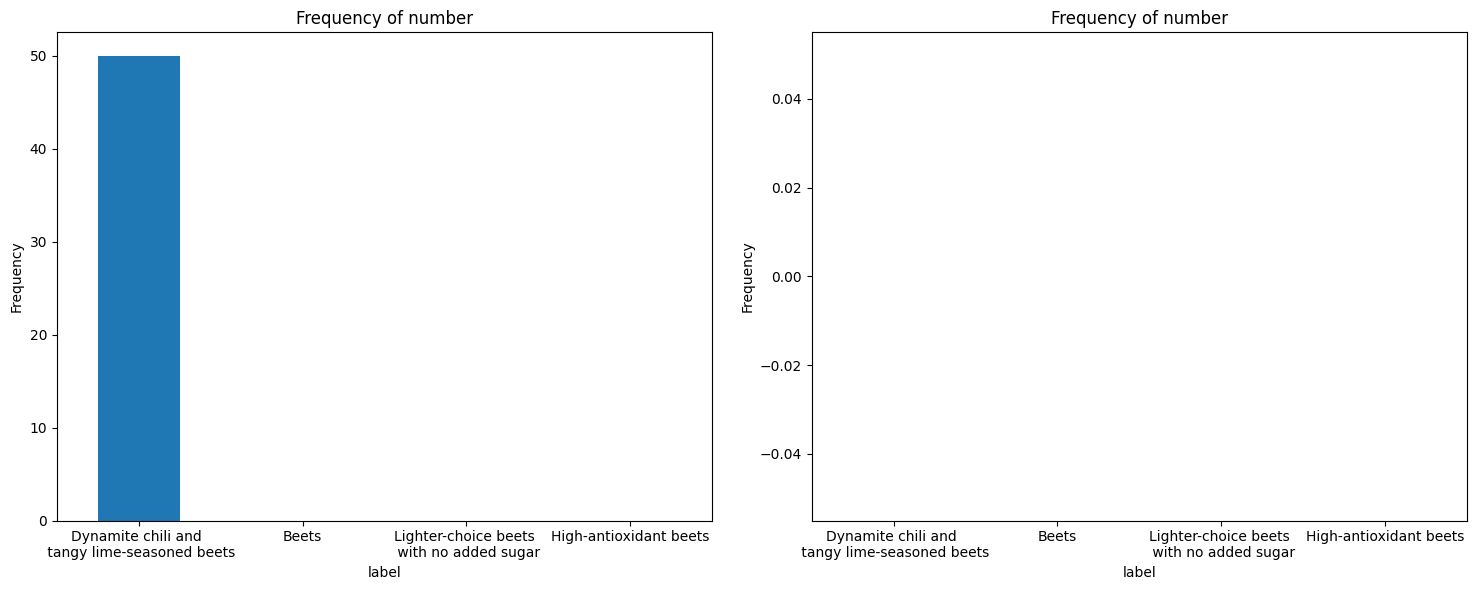

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dictionaries to map numeric values to descriptive labels
choice_1_dic = {
    1: "Dynamite chili and \n tangy lime-seasoned beets",
    2: "Beets",
    3: "Lighter-choice beets \n with no added sugar",
    4: "High-antioxidant beets"
}

choice_2_dic = {
    1:"Beets",
    2:"Dynamite chili and tangy lime-seasoned beets",
    3:"Lighter-choice beets with no added sugar",
    4:"High-antioxidant beets"
}

column = "number"

# Define a function to plot frequency of numbers associated with descriptive labels
def plot_frequency(df,column,choice_dic, ax):
    frequency = df[column].value_counts().sort_index()
    frequency.index = frequency.index.map(lambda x: choice_dic[x])
    desired_order = list(choice_1_dic.values())
    frequency = frequency.reindex(desired_order)
    frequency.plot(kind='bar', ax=ax)
    ax.set_xlabel('label')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {column}')
    ax.tick_params(axis='x', rotation=0)

# Create DataFrame 1 (df_1) and DataFrame 2 (df_2) before calling this function

# Plot frequency for DataFrame 1
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1)
plot_frequency(df_1, column,choice_1_dic, ax1)

# Plot frequency for DataFrame 2
ax2 = plt.subplot(1, 2, 2)
plot_frequency(df_2, column,choice_2_dic, ax2)

plt.tight_layout()
plt.show()


{1: 'Dynamite chili and \n tangy lime-seasoned beets', 2: 'Beets', 3: 'Lighter-choice beets \n with no added sugar', 4: 'High-antioxidant beets'}
